In [43]:
import itertools
import networkx as nx
import matplotlib.pyplot as plt

In [44]:
class Graph:
    def __init__(self, vertices):
        self.vertices = vertices
        self.labels = [None] * vertices
        self.edges = [[0] * vertices for _ in range(vertices)]

    def add_edge(self, src, dest, weight):
        self.edges[src][dest] = weight
        self.edges[dest][src] = weight

    def get_weight(self, src, dest):
        return self.edges[src][dest]
    
    def set_label(self, node, label):
        self.labels[node] = label

    def get_label(self, node):
        return self.labels[node]


In [45]:
def traveling_salesman(graph, start):
    # Generate all possible permutations of the remaining vertices
    remaining_vertices = [i for i in range(graph.vertices) if i != start]
    permutations = [[start] + list(perm) for perm in itertools.permutations(remaining_vertices)]
    
    # Calculate the total distance for each permutation
    min_distance = float('inf')
    optimal_path = None
    for path in permutations:
        distance = 0
        for i in range(graph.vertices - 1):
            distance += graph.get_weight(path[i], path[i + 1])
        if distance < min_distance:
            min_distance = distance
            optimal_path = path

    return optimal_path, min_distance

In [46]:
def render_graph(graph):
    G = nx.Graph()

    for node in range(graph.vertices):
        G.add_node(node, label=graph.get_label(node))

    for src in range(graph.vertices):
        for dest in range(src + 1, graph.vertices):
            weight = graph.get_weight(src, dest)
            if weight > 0:
                G.add_edge(src, dest, weight=weight)

    labels = nx.get_node_attributes(G, 'label')
    edge_labels = nx.get_edge_attributes(G, 'weight')

    pos = nx.spring_layout(G)

    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)
    nx.draw_networkx_edges(G, pos, edge_color='gray')

    nx.draw_networkx_labels(G, pos, labels, font_size=12)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

    plt.axis('off')
    plt.show()

In [47]:
def parse_adjacency_matrix(matrix):
    num_vertices = len(matrix[0])
    graph = Graph(num_vertices)

    for i in range(num_vertices):
        for j in range(num_vertices):
            graph.add_edge(i, j, matrix[i][j])

    return graph

In [48]:
def print_optimal_path(graph, optimal_path):
    path_str = ''
    total_distance = 0
    for i in range(len(optimal_path) - 1):
        src = optimal_path[i]
        dest = optimal_path[i + 1]
        distance = graph.get_weight(src, dest)
        total_distance += distance
        path_str += f'{graph.get_label(src)} -> ({distance}) -> '
    path_str += f'{graph.get_label(optimal_path[-1])}'
    print('Optimal Path:', path_str)
    print('Total Distance:', total_distance)

In [49]:
# Create a graph with 4 nodes
graph = Graph(4)

cities_distance = [
   # A  B  C  D
    [0, 10, 20, 30],  # A
    [10, 0, 30, 20],  # B
    [20, 30, 0, 20],  # C
    [20, 25, 30, 0]   # D
]

graph = parse_adjacency_matrix(cities_distance)
graph.set_label(0, 'A')
graph.set_label(1, 'B')
graph.set_label(2, 'C')
graph.set_label(3, 'D')

optimal_path, min_distance = traveling_salesman(graph, 0)
print_optimal_path(graph, optimal_path)

[[0, 1, 2, 3], [0, 1, 3, 2], [0, 2, 1, 3], [0, 2, 3, 1], [0, 3, 1, 2], [0, 3, 2, 1]]
Optimal Path: A -> (10) -> B -> (25) -> D -> (30) -> C
Total Distance: 65


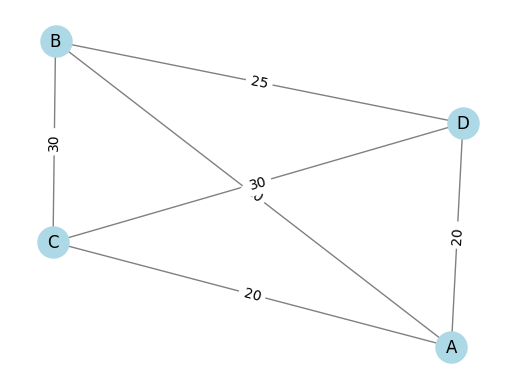

In [50]:
render_graph(graph)